In [64]:
import pandas as pd

p1="Bachelors_degree_CSV.csv"
p2="Masters_degree_CSV.csv"
p3="Doctrate_degree_CSV.csv"

df1=pd.read_csv(p1)
df2=pd.read_csv(p2)
df3=pd.read_csv(p3)

In [65]:
df3.drop([1,2,34,35,36,37,38],0,inplace=True);
df2.drop([1,2,36,37,38,39,40],0,inplace=True);
df1.drop([1,2,36,37,38,39,40],0,inplace=True);

In [66]:
df1=df1.rename(columns=df1.iloc[0]).drop(df1.index[0])
df2=df2.rename(columns=df2.iloc[0]).drop(df2.index[0])
df3=df3.rename(columns=df3.iloc[0]).drop(df3.index[0])

In [67]:
df1=df1.fillna(0)
df2=df2.fillna(0)
df3=df3.fillna(0)



In [68]:
df1 = df1.replace(',','', regex=True)
df2 = df2.replace(',','', regex=True)
df3 = df3.replace(',','', regex=True)

In [69]:
def change_dtype(value):
      try:
          return int(value)
      except ValueError:
          try:
              return float(value)
          except ValueError:
              return value

for column in df1.columns:
      df1.loc[:, column] = df1[column].apply(change_dtype)
for column in df2.columns:
     df2.loc[:, column] = df2[column].apply(change_dtype)
for column in df3.columns:
      df3.loc[:, column] = df3[column].apply(change_dtype)


In [70]:
df=pd.concat([df1, df2,df3]).groupby(['Field of study']).sum().reset_index()
df=df.set_index('Field of study')
df=df.rename(index={"Business\\2\\":"Business","Agriculture and natural resources\\1\\":"Agriculture and natural resources","Engineering technologies\\3\\":"Engineering technologies"})

df=df.reset_index()


<AxesSubplot:>

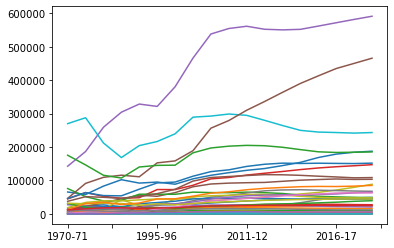

In [71]:
df = df.set_index('Field of study').T
df.plot(legend=False)

In [72]:
df.reindex()

df=df.rename( index={'1970-71': 1971,'1975-76':1976,'1980-81':1981,'1985-86':1986,'1990-91':1991,'1975-76':1976,'1995-96':1996,'2000-01':2001,'2005-06':2006,'2009-10':2010,'2011-12':2012,'2012-13':2013,'2013-14':2014,'2014-15':2015,'2015-16':2016,'2016-17':2017,'2017-18':2018,"2018-19":2019,"2010-11":2011})

In [73]:
df

Field of study,Agriculture and natural resources,Architecture and related services,Area ethnic cultural gender and group studies,Biological and biomedical sciences,Business,Communication journalism and related programs,Communications technologies,Computer and information sciences,Computer and information sciences,Education,...,Parks recreation leisure and fitness studies,Philosophy and religious studies,Physical sciences and science technologies,Precision production,Psychology,Public administration and social services,Social sciences and history,Theology and religious vocations,Transportation and materials moving,Visual and performing arts
1971,16215,7311,3754,44933,142660,12239,564,1716,2388,270014,...,1841,10030,32070,0,46048,13425,175523,11779,0,37690
1976,23670,12443,4756,63958,186669,23202,1410,2847,5652,287700,...,5768,10361,30274,0,63602,30941,146506,15476,225,51575
1981,26956,12701,3850,52484,259217,32495,2074,4470,15121,212066,...,6414,8418,32287,0,54867,34872,115580,18142,263,49762
1986,21782,12452,4092,46864,304299,45378,1793,8414,42337,168573,...,5232,8069,31092,2,54066,27961,107359,18521,2295,46383
1991,17604,13406,6168,48468,328605,56032,1614,10000,25159,204348,...,4826,9358,25863,2,73936,32685,140352,16373,3028,51681
1996,27235,12486,7468,72857,321543,52738,1341,11448,24506,216566,...,14762,9454,30215,20,92709,44577,145251,17718,4480,60643
2001,28769,12935,7931,72818,380297,63599,1607,17679,44142,239571,...,20479,10703,27127,33,95275,45289,145757,18282,4504,73719
2006,28899,15459,10184,85547,466150,81225,3511,18611,47702,289441,...,29677,14297,31226,64,112828,53182,182750,21735,6133,98206
2010,32707,17541,10648,104793,538116,89480,5248,19554,39593,292689,...,39215,15215,34512,39,126518,61999,197254,23638,6072,108959
2011,35642,17824,11146,109001,554597,92110,5361,21104,43066,298777,...,42737,15473,36386,48,131819,66264,202644,24617,6331,111862


In [74]:
names=df.iloc[:,0]
names

1971    16215
1976    23670
1981    26956
1986    21782
1991    17604
1996    27235
2001    28769
2006    28899
2010    32707
2011    35642
2012    38695
2013    41339
2014    43076
2015    44265
2016    45223
2017    46138
2018    47780
2019    49359
Name: Agriculture and natural resources, dtype: int64

In [75]:
sum=df.sum(axis=1)
sum_df=pd.DataFrame({
    "Major":names,
    "Total": sum
})
sum_df

,Major,Total
1971,16215,1140292
1976,23670,1334230
1981,26956,1335793
1986,21782,1383953
1991,17604,1542948
1996,27235,1692479
2001,28769,1837258
2006,28899,2223022
2010,32707,2501822
2011,35642,2610802


In [76]:
sum_df=sum_df.sort_values(by="Total",ascending=False)

In [77]:
sum_df

,Major,Total
2019,49359,3034128
2018,47780,2984641
2017,46138,2942013
2016,45223,2884641
2015,44265,2832321
2014,43076,2802319
2013,41339,2767125
2012,38695,2718347
2011,35642,2610802
2010,32707,2501822


In [78]:
import plotly.express as px
fig = px.line(df)
fig.show()